In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('augmentedReviewsCSV.csv')

# Quick data check
print(df.head())


         date                reviewID              reviewerID  \
0   6/18/2011  ySPivP3lUfQgln_4DWyIpw  EbLoh6p0Vj8ZFKq2ZHsO7A   
1   10/2/2009  AZo5sIJ6bg6WFMLV6UKS7w  HmHevd01E3XkzuS_3Ci0Vw   
2    5/7/2011  YrsjtyvX6-RSUkbxRkRHVQ  3j-8dBY7_YoVe_4Ly0Rgig   
3   5/11/2007  wcxsZVcNgea9Rkzke4o91A  fAQZZK5TwwkGH22olxP_aw   
4  11/17/2008  DBDPkyProsArGeMrPInbsA  -zDFJlIwW8hK3VfiAMGiCg   

                                       reviewContent  rating  usefulCount  \
0  torn mavin rate placeso ill give dinner party ...       3            0   
1  good food �nice present �excel servic � come h...       4            0   
2  doug sausag jedi mani place wait get long  pla...       5            0   
3  im pig sleep with place place never buy someth...       5            0   
4  eschew hourlong wait hell kitchen companion de...       4            3   

   coolCount  funnyCount flagged            restaurantID  label  \
0          0           0       Y  vvhfPV-Llkd4fE2SHuLVvA      1   
1          0

In [2]:
# Convert 'flagged' to numerical format if it's categorical ('Y'/'N' to 1/0)
df['flagged'] = df['flagged'].map({'Y': 1, 'N': 0})

# Assuming 'label' is already in the correct format (1 for fake, 0 for real)


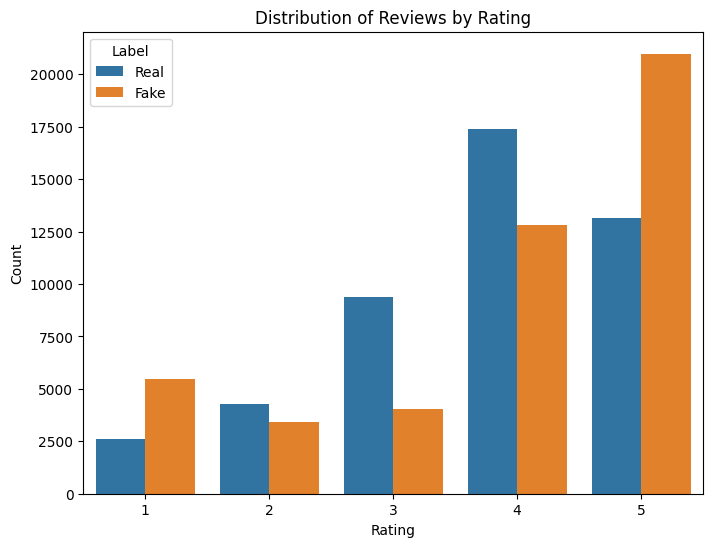

In [5]:
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df, hue='label')
plt.title('Distribution of Reviews by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Label', labels=['Real', 'Fake'])
plt.show()


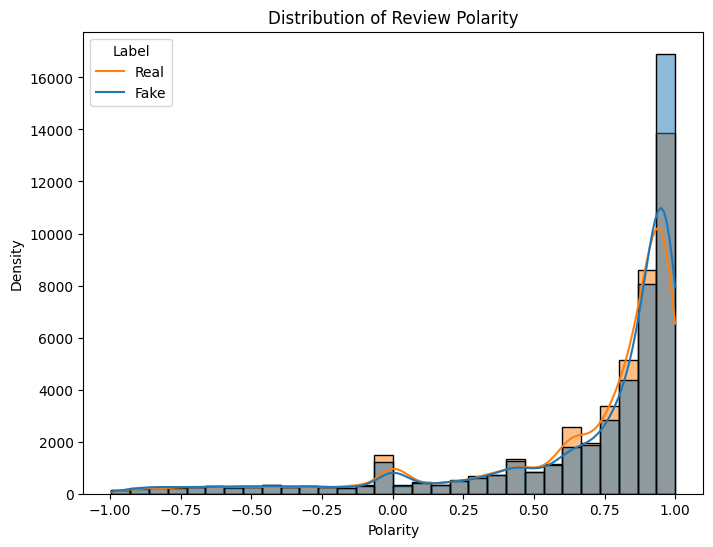

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Polarity', bins=30, hue='label', kde=True)
plt.title('Distribution of Review Polarity')
plt.xlabel('Polarity')
plt.ylabel('Density')
plt.legend(title='Label', labels=['Real', 'Fake'])
plt.show()


In [7]:
print(f"Dataset contains {len(df)} reviews.")


Dataset contains 93494 reviews.


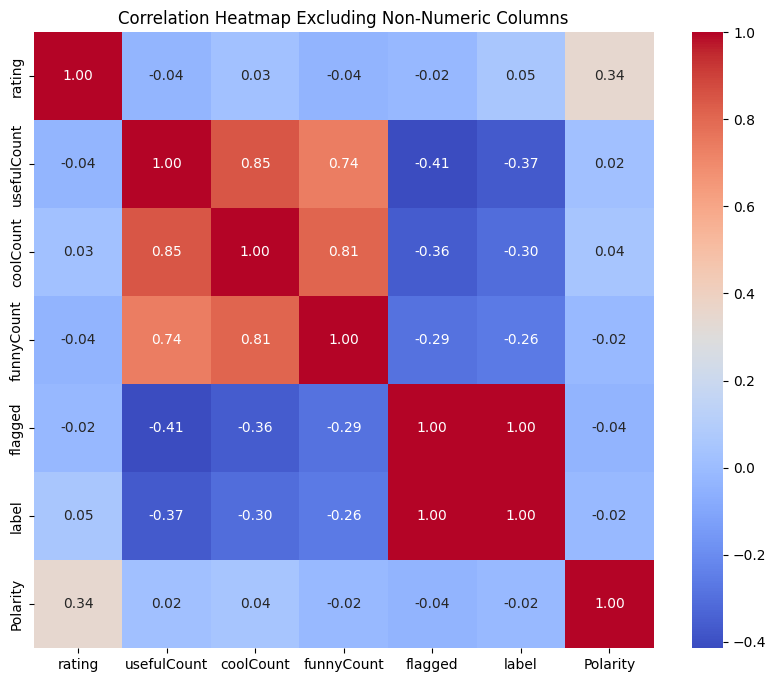

In [11]:
# Exclude non-numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlations on numeric dataframe
correlation_matrix = numeric_df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap Excluding Non-Numeric Columns')
plt.show()


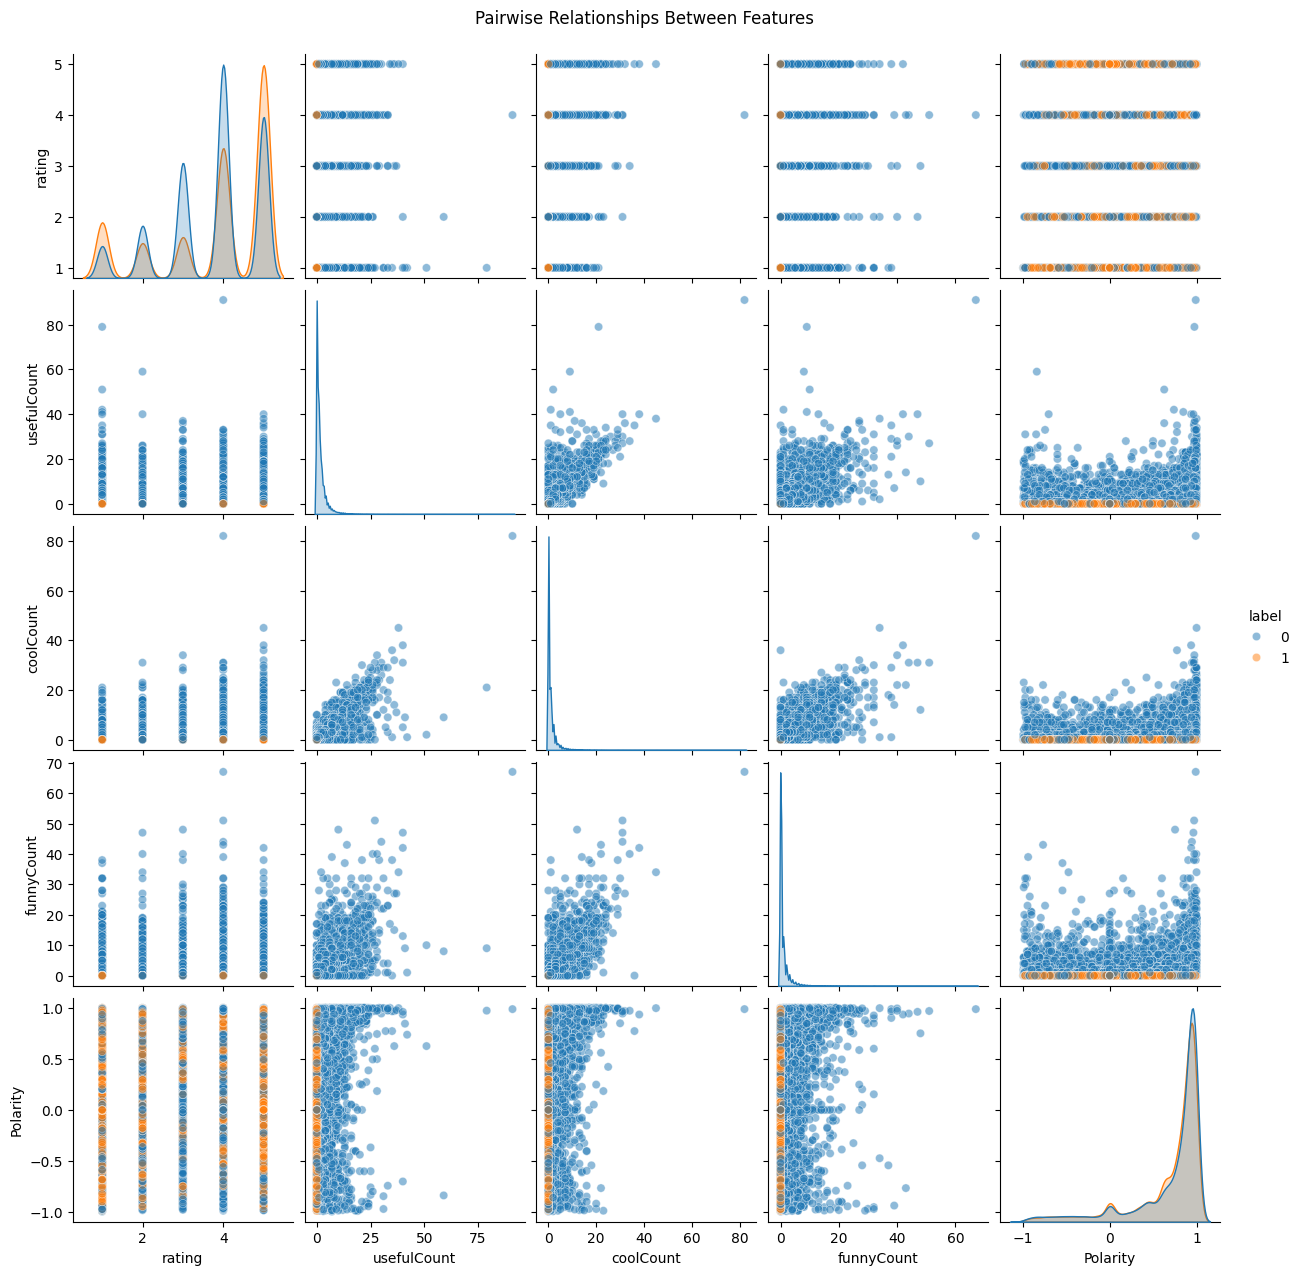

In [12]:
# Select a subset of numerical columns to avoid overcrowding the plot
selected_columns = numeric_df[['rating', 'usefulCount', 'coolCount', 'funnyCount', 'Polarity', 'label']]
sns.pairplot(selected_columns, hue='label', plot_kws={'alpha':0.5})
plt.suptitle('Pairwise Relationships Between Features', y=1.02)  # Adjust title position
plt.show()


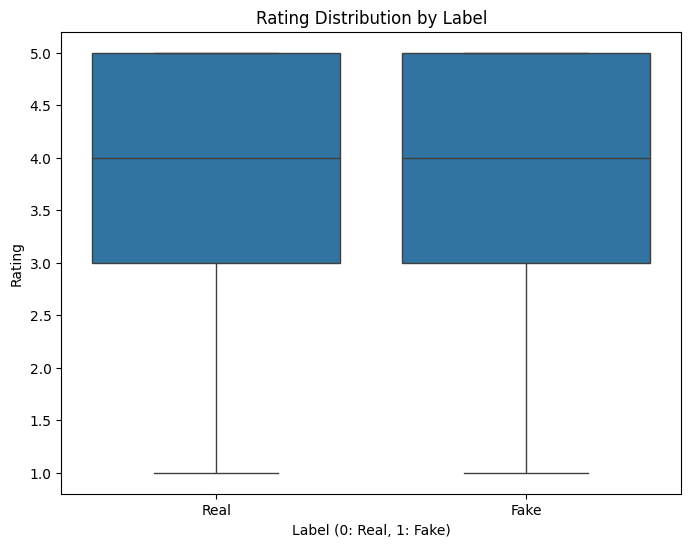

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='rating', data=df)
plt.title('Rating Distribution by Label')
plt.xlabel('Label (0: Real, 1: Fake)')
plt.ylabel('Rating')
plt.xticks([0, 1], ['Real', 'Fake'])  # Ensure clarity in labeling
plt.show()
